In [1]:
%load_ext autoreload
%autoreload 2
import json
from urllib.request import urlretrieve
import numpy as np
from PIL import Image
import copy


annotation_path = '/home/michal/studia/ZPI/data/face_detection.json'
with open(annotation_path, 'r') as file:
    lines = file.readlines()
    annotations = [json.loads(a) for a in lines]

In [3]:
def download_sample(annotations, sample_size=10):
    sample_indxs = np.random.choice(np.arange(len(annotations)), sample_size, replace=False)
    sample = copy.deepcopy([annotations[i] for i in sample_indxs])
    paths = [urlretrieve(s['content'])[0] for s in sample]
    
    for s, path in zip(sample, paths):
        image = Image.open(path)
        s['image'] = image
        
    return sample
    
sample = download_sample(annotations)

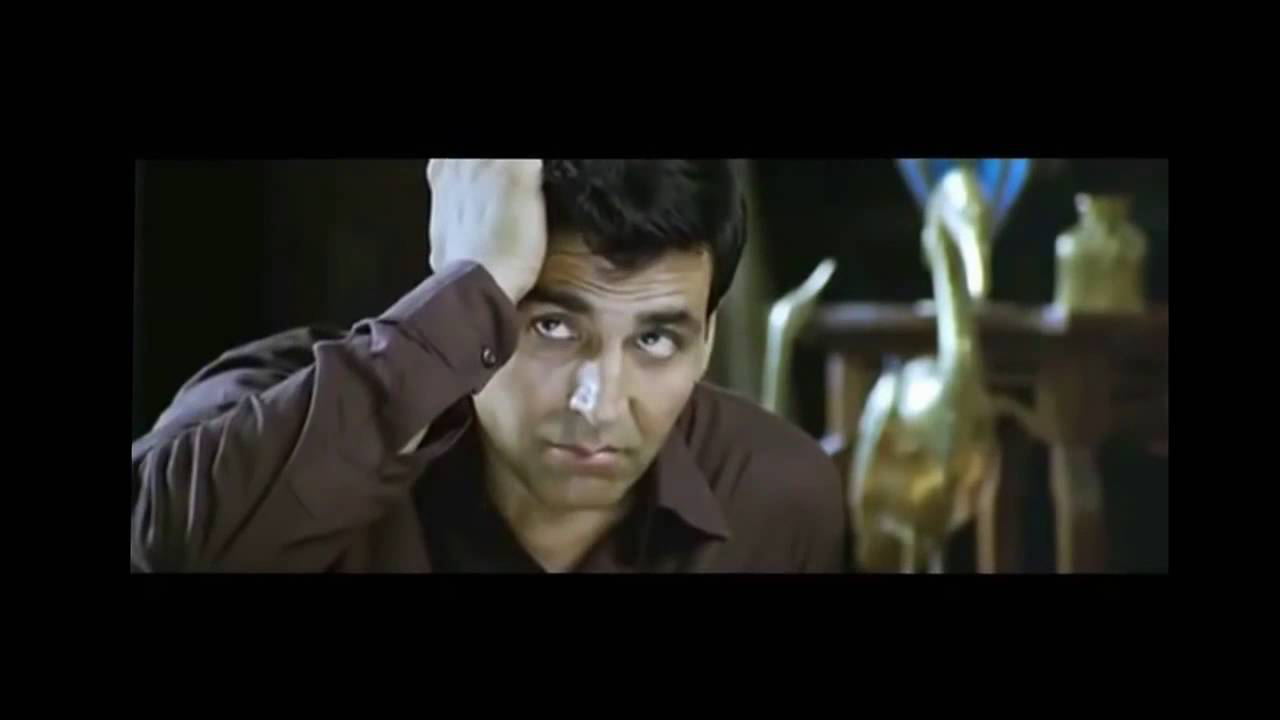

In [4]:
sample[0]['image']

In [9]:
import sys
sys.path.append('..')
from blur_face.blurring import GaussianBlur, ImageBlur, PixelBlur
from blur_face.bounding_box import BoundingBox

def annot_to_bbox(annot):
    left_upper, right_lower = annot['points']
    left_upper_x = left_upper['x'] * annot['imageWidth']
    left_upper_y = left_upper['y'] * annot['imageHeight']
    right_lower_x = right_lower['x'] * annot['imageWidth']
    right_lower_y = right_lower['y'] * annot['imageHeight']
    return BoundingBox(int(left_upper_x), int(left_upper_y), int(right_lower_x), int(right_lower_y))

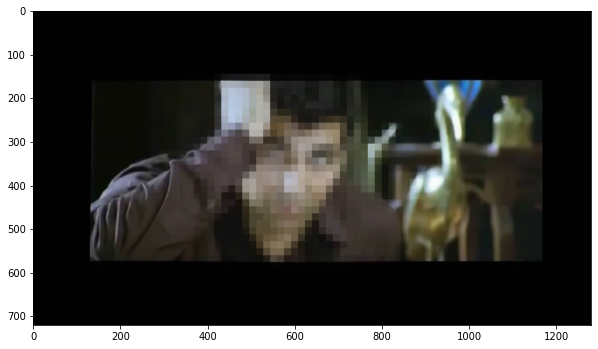

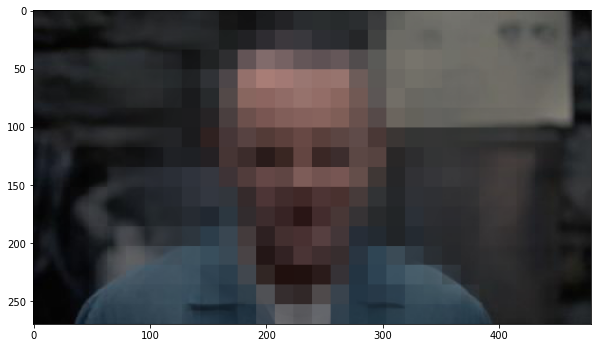

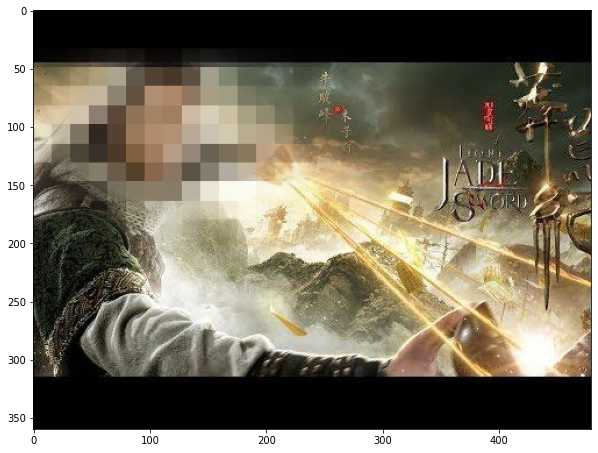

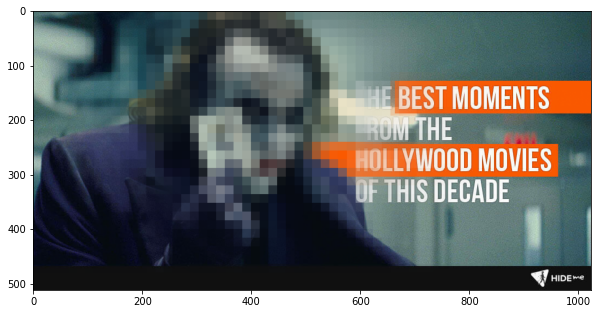

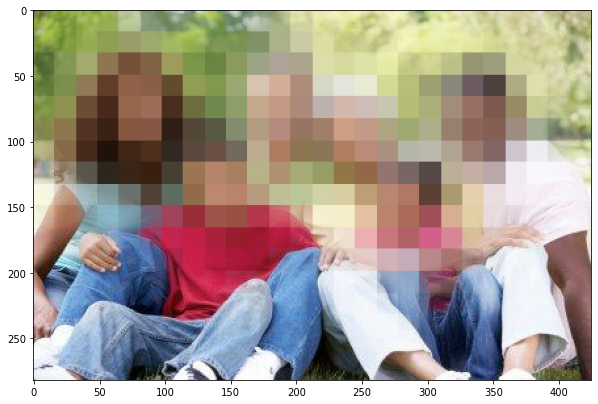

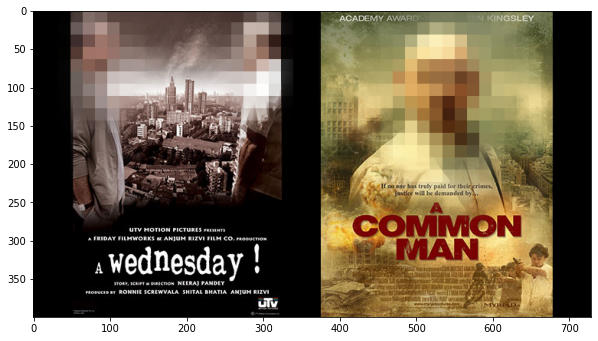

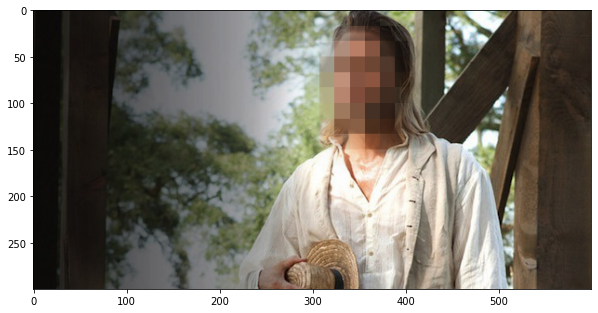

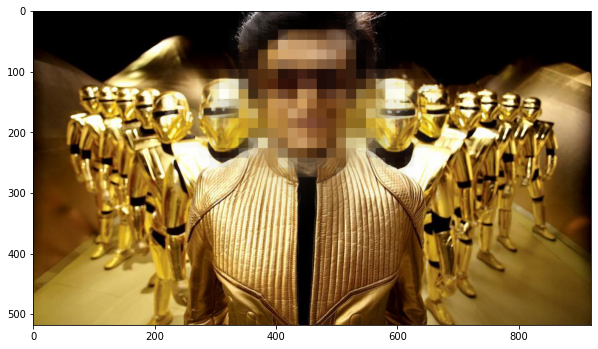

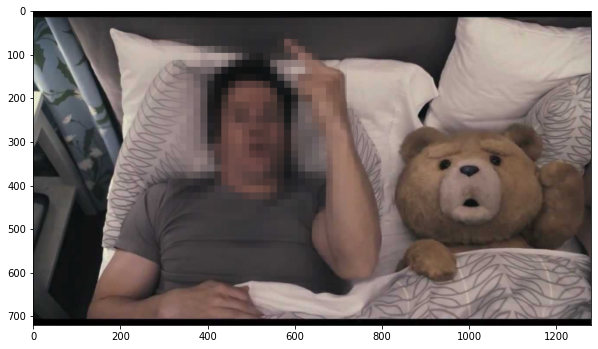

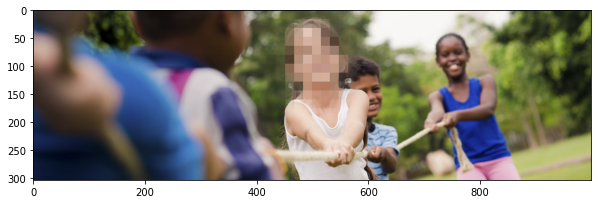

In [13]:
from time import time
import matplotlib.pyplot as plt

# blur = GaussianBlur(51, 15)
blur = PixelBlur(16)
imblur = ImageBlur(
    blur, 2, 2.5
)

for s in sample:
    image = s['image']
    bboxes = [annot_to_bbox(a) for a in s['annotation']]
    plt.figure(figsize=(10, 10))
    plt.imshow(imblur.blur(image, bboxes))
    plt.savefig(f'figs/{time()}.png')
    plt.show()


In [8]:
s = sample[-1]
image = s['image']
bboxes = [annot_to_bbox(a) for a in s['annotation']]
plt.figure(figsize=(10, 10))
i, m = imblur.blur(image, bboxes)
plt.imshow(m)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
mask.max()